<a href="https://colab.research.google.com/github/nadjakencana/Visi_Komputer/blob/main/JOBSHEET_02_KLASIFIKASI_GAMBAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tugas 1

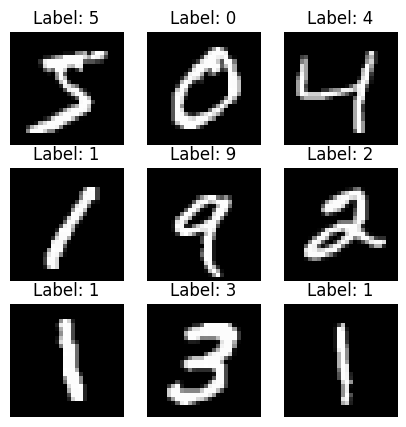

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


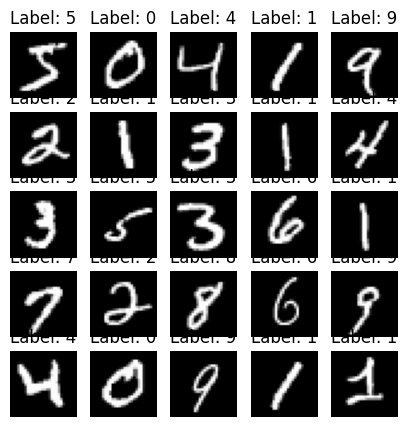

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


## Tugas 2

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9101


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM dengan kernel RBF
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


## Tugas 3

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8068 - loss: 0.5498 - val_accuracy: 0.8872 - val_loss: 0.3160
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9016 - loss: 0.2806 - val_accuracy: 0.9028 - val_loss: 0.2744
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9146 - loss: 0.2322 - val_accuracy: 0.8968 - val_loss: 0.2749
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9271 - loss: 0.1986 - val_accuracy: 0.9130 - val_loss: 0.2439
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9370 - loss: 0.1719 - val_accuracy: 0.9112 - val_loss: 0.2573


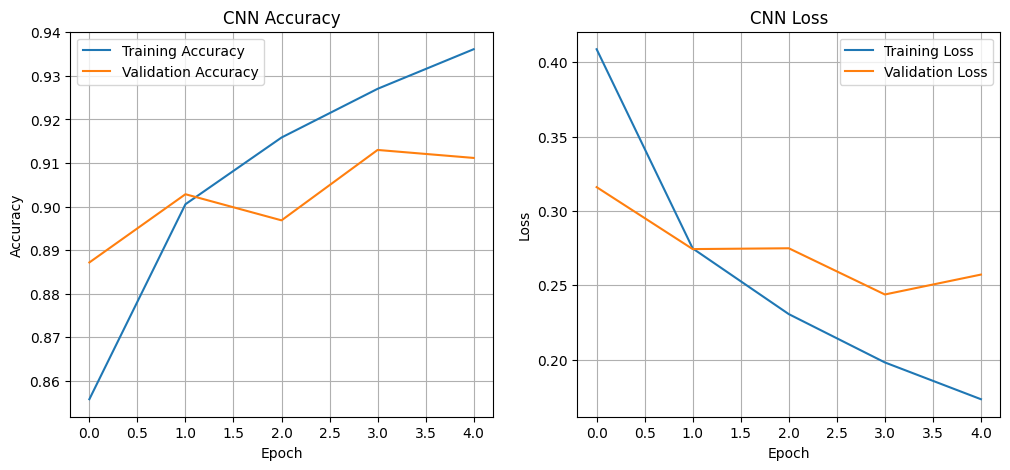

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Assuming x_train, x_test, y_train, y_test are already loaded (e.g., from Fashion MNIST or MNIST)
# Load a dataset for demonstration purposes
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Data preprocessing
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# Plot training and validation history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7580 - loss: 0.6701 - val_accuracy: 0.8638 - val_loss: 0.3705
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.8788 - loss: 0.3328 - val_accuracy: 0.8888 - val_loss: 0.3063
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9000 - loss: 0.2732 - val_accuracy: 0.8968 - val_loss: 0.2806
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9123 - loss: 0.2402 - val_accuracy: 0.8993 - val_loss: 0.2792
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9232 - loss: 0.2118 - val_accuracy: 0.9025 - val_loss: 0.2575


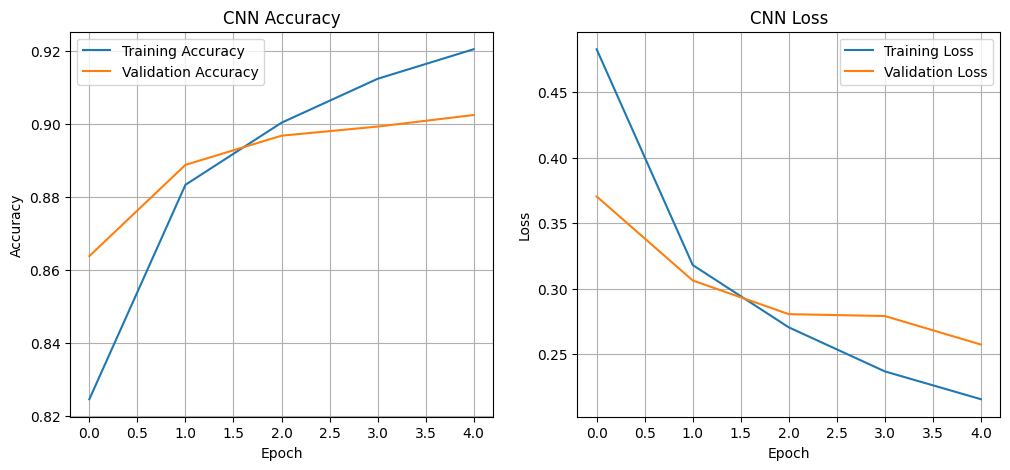

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Assuming x_train, x_test, y_train, y_test are already loaded (e.g., from Fashion MNIST or MNIST)
# Load a dataset for demonstration purposes
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Data preprocessing
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# Build the CNN model with an additional Conv2D layer
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    # New layer added here
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# Plot training and validation history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

## Tugas 4

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.3503 - loss: 1.7686 - val_accuracy: 0.5546 - val_loss: 1.2598
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.5827 - loss: 1.1882 - val_accuracy: 0.6258 - val_loss: 1.0745
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.6414 - loss: 1.0368 - val_accuracy: 0.6550 - val_loss: 1.0009
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.6730 - loss: 0.9408 - val_accuracy: 0.6810 - val_loss: 0.9337
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.6955 - loss: 0.8690 - val_accuracy: 0.6800 - val_loss: 0.9289
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.7168 - loss: 0.8162 - val_accuracy: 0.6894 - val_loss: 0.9240
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.7348 - loss: 0.7617 - val_accuracy: 0.7000 - val_loss: 0.8927
Epoch 8/10
1407/1407 ━━

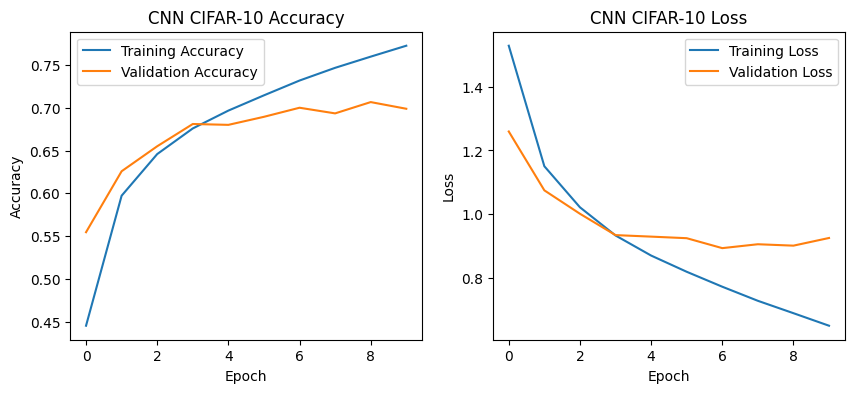

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.2569 - loss: 1.9900 - val_accuracy: 0.5078 - val_loss: 1.4043
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - accuracy: 0.4386 - loss: 1.5341 - val_accuracy: 0.5652 - val_loss: 1.2734
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.4947 - loss: 1.3917 - val_accuracy: 0.6092 - val_loss: 1.1299
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.5327 - loss: 1.2936 - val_accuracy: 0.6158 - val_loss: 1.1041
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.5588 - loss: 1.2214 - val_accuracy: 0.6354 - val_loss: 1.0545
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.5835 - loss: 1.1634 - val_accuracy: 0.6626 - val_loss: 0.9869
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.5890 - loss: 1.1416 - val_accuracy: 0.6682 - val_loss: 0.9727
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.6002 -

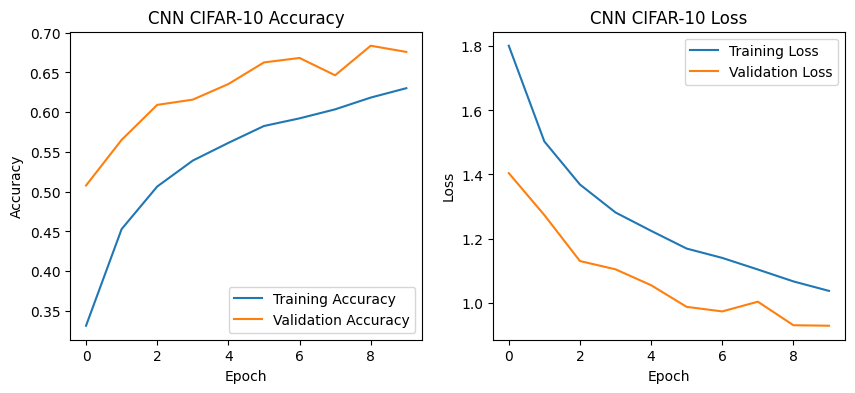

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5), # Lapisan Dropout baru
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Tugas 5

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 453s 321ms/step - accuracy: 0.4590 - loss: 1.5594 - val_accuracy: 0.5696 - val_loss: 1.2175
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 471s 299ms/step - accuracy: 0.5773 - loss: 1.2067 - val_accuracy: 0.5846 - val_loss: 1.1763
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 419s 298ms/step - accuracy: 0.5986 - loss: 1.1370 - val_accuracy: 0.6022 - val_loss: 1.1297
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 446s 301ms/step - accuracy: 0.6160 - loss: 1.0958 - val_accuracy: 0.6102 - val_loss: 1.1209
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 477s 326ms/step - accuracy: 0.6316 - loss: 1.0577 - val_accuracy: 0.6110 - val_loss: 1.1177


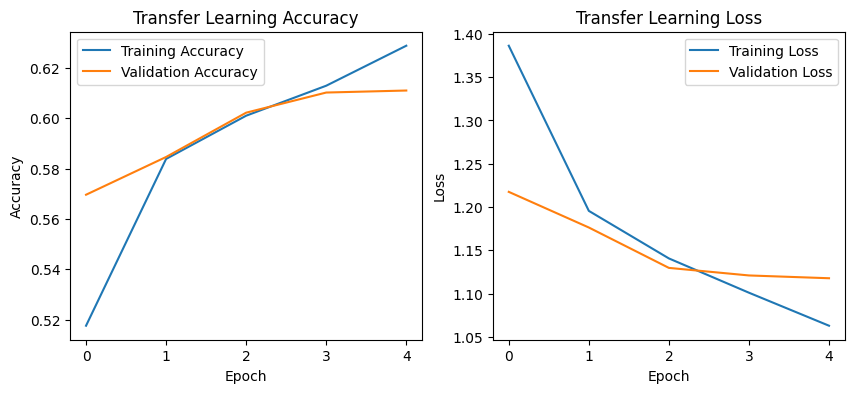

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Assuming x_train and y_train are already defined and loaded
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1461s 1s/step - accuracy: 0.4769 - loss: 1.5229 - val_accuracy: 0.6758 - val_loss: 0.9404
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1451s 1s/step - accuracy: 0.6921 - loss: 0.8959 - val_accuracy: 0.6952 - val_loss: 0.8634
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1451s 1s/step - accuracy: 0.7309 - loss: 0.7785 - val_accuracy: 0.7178 - val_loss: 0.8114
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1461s 1s/step - accuracy: 0.7550 - loss: 0.7052 - val_accuracy: 0.7342 - val_loss: 0.7578
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1460s 1s/step - accuracy: 0.7771 - loss: 0.6487 - val_accuracy: 0.7346 - val_loss: 0.7655


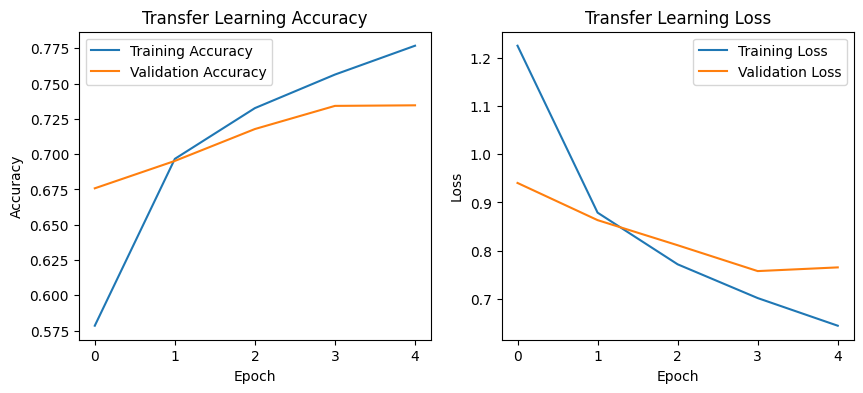

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Asumsi x_train, y_train, x_test, y_test sudah dimuat
# dari CIFAR-10. Pastikan datanya sudah dinormalisasi
# ke rentang [0, 1].
# from tensorflow.keras.datasets import cifar10
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = True # Mengaktifkan seluruh base_model

# Membekukan (freeze) semua lapisan di VGG16, kecuali 2 lapisan terakhir
set_trainable = False
for layer in base_model.layers:
    if layer.name.startswith('block5_conv'):
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Membangun model baru
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Mengompilasi ulang dengan learning rate yang lebih rendah
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Tugas 6

313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 279ms/step
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1000
           1       0.64      0.70      0.67      1000
           2       0.47      0.56      0.51      1000
           3       0.45      0.41      0.43      1000
           4       0.54      0.54      0.54      1000
           5       0.59      0.47      0.53      1000
           6       0.61      0.68      0.65      1000
           7       0.65      0.69      0.66      1000
           8       0.82      0.60      0.70      1000
           9       0.59      0.62      0.61      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



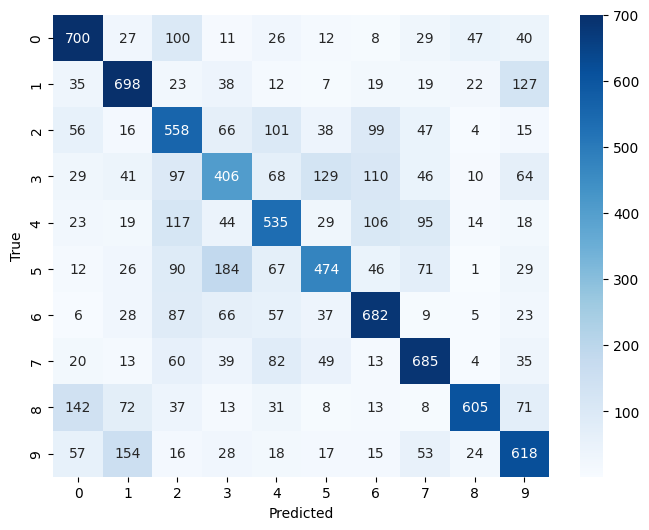

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Penugasan

In [2]:
# === 1) Upload file foto tulisan angka ===
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)

# === 2) Utilitas Preprocess mirip MNIST (28x28, putih-di-atas-hitam) ===
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
  """
  Langkah:
  - Konversi ke grayscale
  - Auto-contrast
  - (Opsional) Invert bila latar terang (agar digit jadi putih, latar
    jadi gelap seperti MNIST)
  - Crop ke bounding box digit
  - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
  - Normalisasi ke [0,1] dan tambah axis channel
  """
  # Grayscale + autocontrast
  img = img_pil.convert('L')
  img = ImageOps.autocontrast(img)

  arr = np.array(img).astype(np.uint8)

  # Jika rata-rata terang (kertas putih), invert supaya digit menjadi
  # putih di atas latar gelap (gaya MNIST)
  if arr.mean() > 127:
    img = ImageOps.invert(img)
    arr = np.array(img)

  # Binarisasi ringan untuk cari bbox digit
  thr = np.mean(arr) * 0.8 # ambang adaptif sederhana
  mask = arr > thr
  if mask.any():
    ys, xs = np.where(mask)
    y0, y1 = np.min(ys), np.max(ys)
    x0, x1 = np.min(xs), np.max(xs)
    img = img.crop((x0, y0, x1+1, y1+1))

  # Resize ke 20x20 dengan aspect ratio
  img.thumbnail((20, 20), Image.Resampling.LANCZOS)
  w, h = img.size

  # Pad ke 28x28 dan center
  canvas = Image.new('L', (28, 28), color=0)
  canvas.paste(img, ((28 - w)//2, (28 - h)//2))

  # Normalisasi ke [0,1]
  arr = np.array(canvas).astype('float32') / 255.0
  # Tambah channel dim (28,28,1)
  arr = arr[..., None]
  return canvas, arr

Saving bjmknjchxv cbla;'lkjcbh.png to bjmknjchxv cbla;'lkjcbh.png


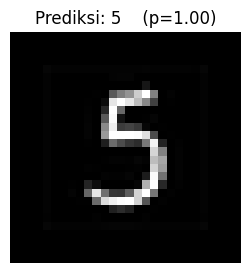

Rekap Prediksi (CNN):
bjmknjchxv cbla;'lkjcbh.png -> 5 (p=0.996)


In [3]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
  img_pil = Image.open(fname)
  disp, x = preprocess_to_mnist_28x28(img_pil) # disp: PIL untuk
  # ditampilkan, x: (28,28,1)
  x_batch = np.expand_dims(x, axis=0) # (1,28,28,1)
  probs = model.predict(x_batch, verbose=0)[0] # shape (10,)
  pred = int(np.argmax(probs))
  conf = float(np.max(probs))

  results.append((fname, pred, conf))

  # Tampilkan hasil
  plt.figure(figsize=(3,3))
  plt.imshow(disp, cmap='gray')
  plt.title(f"Prediksi: {pred}    (p={conf:.2f})")
  plt.axis('off')
  plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
  print(f"{r[0]} -> {r[1]} (p={r[2]:.3f})")